# Data Analysis - Lab 2
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [38]:
# coding: utf-8

import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from math import sqrt,pi,exp

<br/>
<br/>

___
# Exercice A - Multivariate data set : Fisher Iris
In this exercice, we study the Iris data set.
### Question 1 - Open iris.csv as a matrice

We use the comma separator because we saw in the text editor that the data was separated
by commas.

In [ ]:
dataframe = pd.read_csv("data/iris.csv", )
print(dataframe.shape)

dataframe.head()
dataframe.shape()

 As we can see from  the command dataframe.head() & dataframe.shape(), our dataset contains attributes on 150 flowers :  their sepals length and width  and the same measure for their petals

### Question 2 - Display the histograms of the different attributes. 
#### You may use the displot function from the seaborn library.

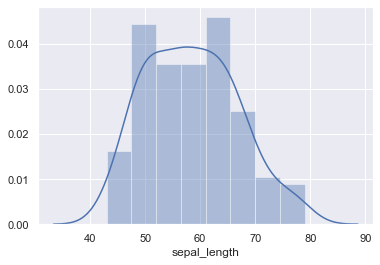

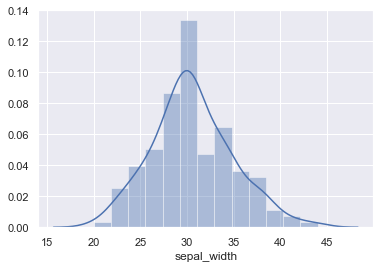

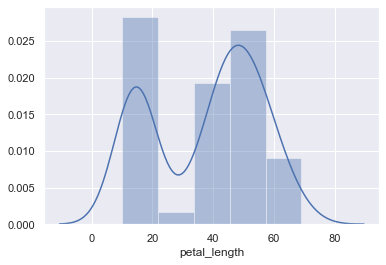

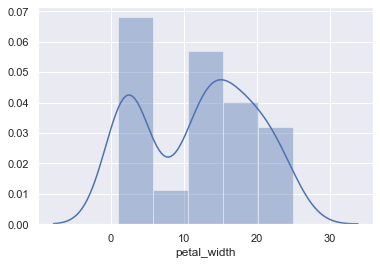

In [21]:
for column in dataframe : 
    sns.distplot(dataframe[column]) 
    plt.show()

####  What can you say about their distributions ?

- We cannot say anything clearly about the distribution of the first attribute. 

- The second one follows approximately a normal distribution with a mode of 30.

- The third and the forth one are bimodal.



### Question 3 - Compute the coefficient of correlation between all attributes

In [46]:
def cov(a, b):
    if len(a) != len(b):
        return "Error : the two vectors should have an equal size."
    return np.sum((a-np.mean(a))*(b-np.mean(b)))/(len(a)-1)

In [62]:
covMatrix = np.zeros((4, 4))
corrMatrix = np.zeros((4, 4))

for i in range(dataframe.shape[1]):
    for j in range(dataframe.shape[1]):
        covMatrix[i][j] = cov(dataframe.values[: , i],dataframe.values[: , j])
        corrMatrix[i][j]= covMatrix[i][j]/(np.std(dataframe.values[: , i]) * np.std(dataframe.values[: , j]))
print(covMatrix)
print(corrMatrix)

[[ 68.56935123  -4.24340045 127.43154362  51.62706935]
 [ -4.24340045  18.99794183 -32.96563758 -12.16393736]
 [127.43154362 -32.96563758 311.62778523 129.5609396 ]
 [ 51.62706935 -12.16393736 129.5609396   58.1006264 ]]
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


We compute both matrix ( covariance and correlations) from the function we made

In [60]:
# Checking values :
dataframe.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,68.569351,-4.243400,127.431544,51.627069
sepal_width,-4.243400,18.997942,-32.965638,-12.163937
petal_length,127.431544,-32.965638,311.627785,129.560940
petal_width,51.627069,-12.163937,129.560940,58.100626


In [61]:
dataframe.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


We check the result with the made-in function from Pandas library, and yes the results are correct. 
Let's visualize our data before going into a deeper interpretation

### Question 4 - Visualize the correlation between the different variables.

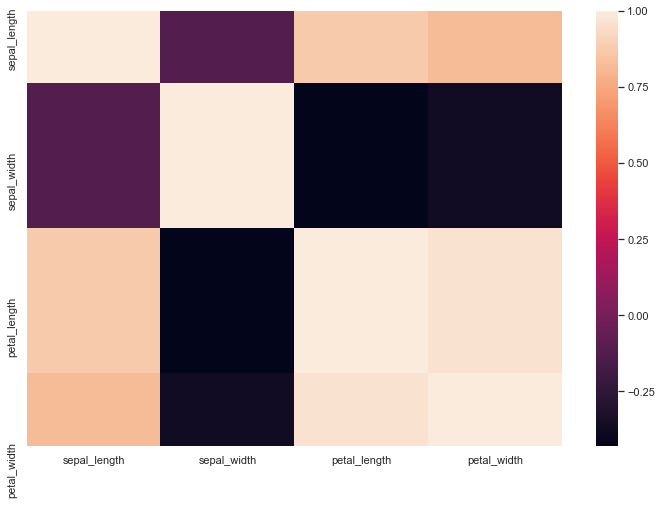

In [68]:
df_corr = dataframe.corr()
figure,axe = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr)

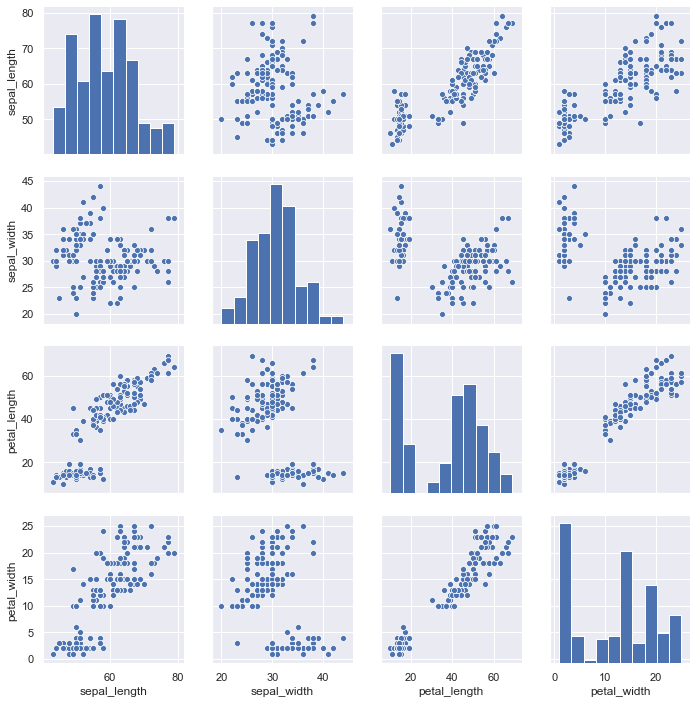

In [17]:
sns.pairplot(dataframe)

### Comment your results :
We used to kind of visualisation, to have a better understanding of our data
The results are the same using the Python function. Using plot, we can see that we have the same intuition looking at :

- Graph 1-3
- Graph 1-4 
- Graph 3-4

The petal lengths and widths  have a good correlation between them, and it's the same for the sepals lengths and widths.
If we have correlation between those attributes we could classify  flowers depending on their petals and sepals

### Question 5 - Compute the confidence intervals for the correlation coefficients

We will suppose that the attributes are following a normal distribution

In [93]:
def IC95(a,b):
    r = cov(a,b) / (np.std(a) * np.std(b)) 
    Z = np.log(abs(1 + r)) - np.log(abs(1 - r))/2
    sz = sqrt(1/(len(a) - 3))
    Zinf = Z - 1.96*sz
    Zsup = Z + 1.96*sz
    ic_interval = [(exp(2*Zinf) - 1)/(exp(2*Zinf) + 1), (exp(2*Zsup) - 1)/(exp(2*Zsup) + 1)]
    return ic_interval  

# Calcul des 16 intervalles de confiance à 95% :
for i in range(dataframe.shape[1]):
    for j in range(dataframe.shape[1]):
        print(IC95(dataframe.values[:,i],dataframe.values[:,j]))

[0.9954049593342427, 0.9975904500997339]
[-0.3306513475916655, -0.020240463271245967]
[0.9084511697929891, 0.9509775316902991]
[0.8632808010381465, 0.9259758887847412]
[-0.3306513475916655, -0.020240463271245967]
[0.9954049593342426, 0.9975904500997338]
[-0.718909635527787, -0.5241672092755515]
[-0.6517500595228215, -0.4260158379237562]
[0.9084511697929891, 0.9509775316902991]
[-0.718909635527787, -0.5241672092755515]
[0.9954049593342427, 0.9975904500997339]
[0.9783809828213526, 0.9886172191872786]
[0.8632808010381465, 0.9259758887847412]
[-0.6517500595228215, -0.4260158379237562]
[0.9783809828213526, 0.9886172191872786]
[0.9954049593342427, 0.9975904500997339]


### Comment your results :

We can confirm  that we got good result because our correlation coefficient are well computed :  they each sit between their distinct inferior and superior bounds.

We observe that two variables with a low coefficient of correlation like the sepal length and the sepal width, r12 = --0.1093692 , the confidence interval is wider.

The span of Confidence Interval (95%) varies from 0.32 to 0.07 when considering the high correlation between the sepal length and the petal length.

Wider the IC95 is, highest the correlation is.